# CAR PRICE PREDICTION WITH MACHINE LEARNING

## Problem Statement
The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So I wanted to learn how to train a car price prediction model this project is done.

## Objective
The objective of this project is to predict the car prices using machine learning techniques.

## About The Data
The dataset contains 9 columns: Car_Name,Year, Selling_Price, Present_Price, Driven_kms, Fuel_Type, Selling_type, Transmission, Owner. 

## Elaborating the process
The process will consist of several steps like: data importing, missing values handling, EDA, preprocessing (if required), model building, performance evaluation.

## The Process

### Importing libraries required for the project  
I need several python libraries for my task. So, I need to import them. I have imported all the required libraries in one Notebook cell.

In [1]:
# !pip install statsmodels
import numpy as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

### Importing the data  
I have downloaded the dataset in my local machine and will perform the task from my local machine.

### Importing the data  
I have downloaded the dataset in my local machine and will perform the task from my local machine.

In [2]:
data = pd.read_csv(r"C:\Users\dsaky\OneDrive\Desktop\Oasis Infobyte\Project 3\car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

Here, we have 9 variables. I will use Car_Name, Year, Present_Price, Driven_kms, Fuel_Type, Selling_type, Transmission, Owner variables to predict Selling_price in this particular problem.

### Missing values and duplicates handling 
Missing values may mislead our results in some cases. So, I will identify missing values and remove them if there is any.

In [4]:
# Checking missing values in dataset
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

I have found no missing values in the dataset. So I will proceed for further analysis.

In [5]:
# Checking duplicates in dataset
data.duplicated().sum()

2

In [6]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

I have found 2 duplicates in the data and dropped them.

### Exploring the data
Before any ML model building it is needed to explore and understand the data. So, I will perform several exploratory analysis on the dataset.

#### Datatypes
First I will start with the datatypes in each of the columns.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [8]:
# Shape of the data
data.shape

(299, 9)

#### Data Summary

In [9]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#### Exploring numeric data

In [10]:
numerical_columns = data.select_dtypes(include=['number']).columns
numerical_data = data[numerical_columns]

##### Pairwise correlation heatmap of numerical columns

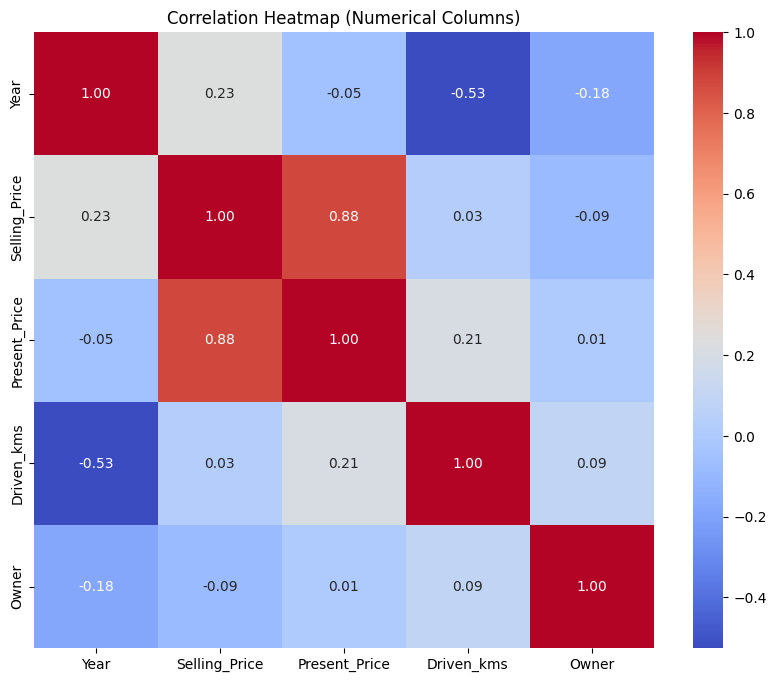

In [11]:
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

##### Graphical representation of the numerical columns

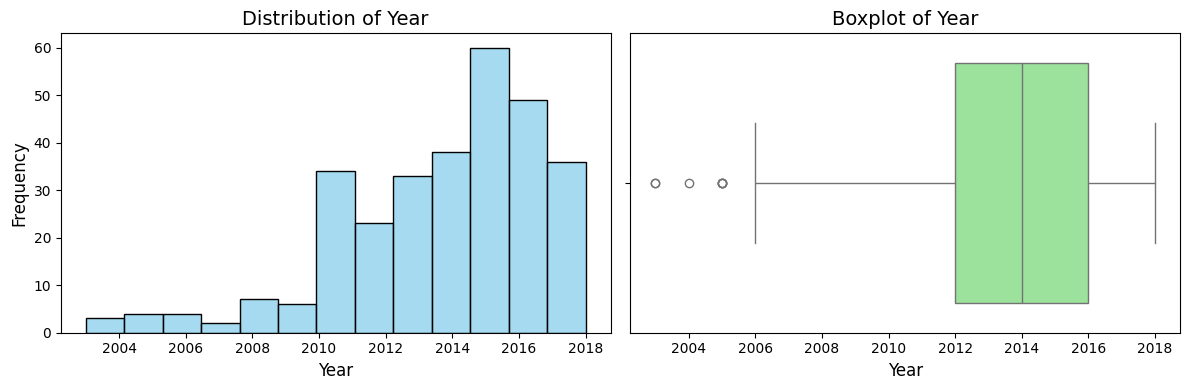

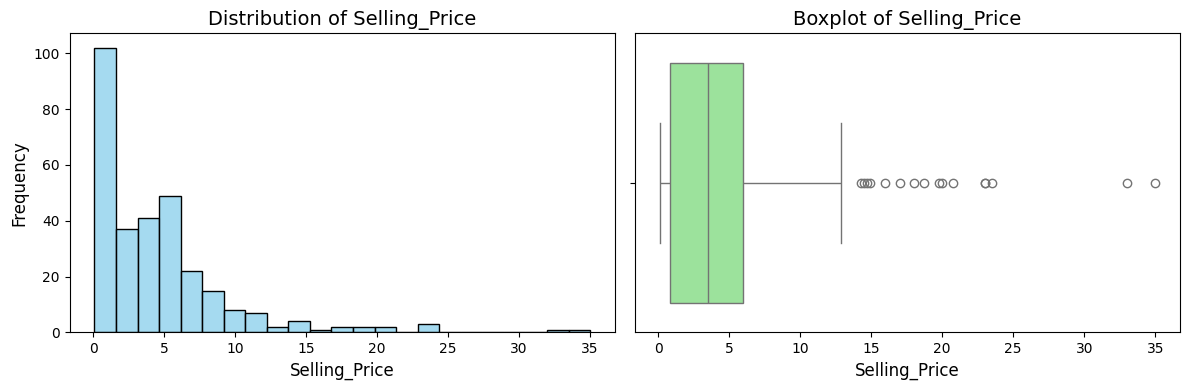

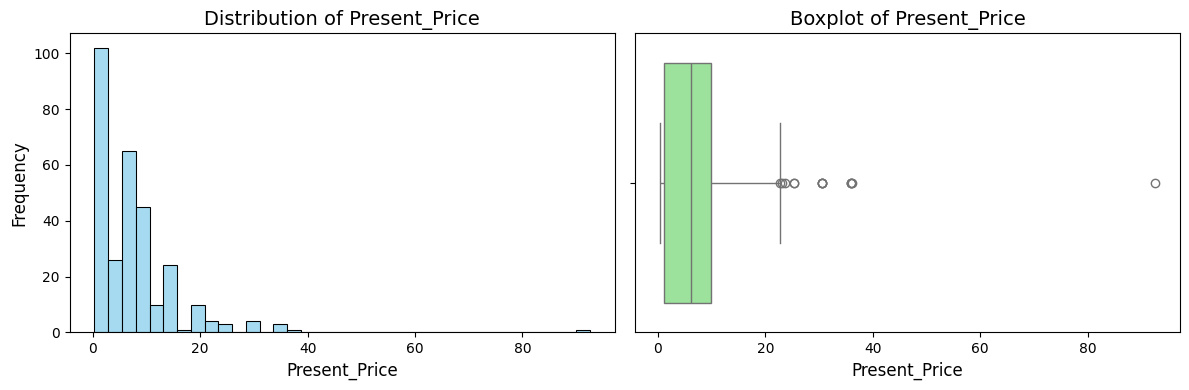

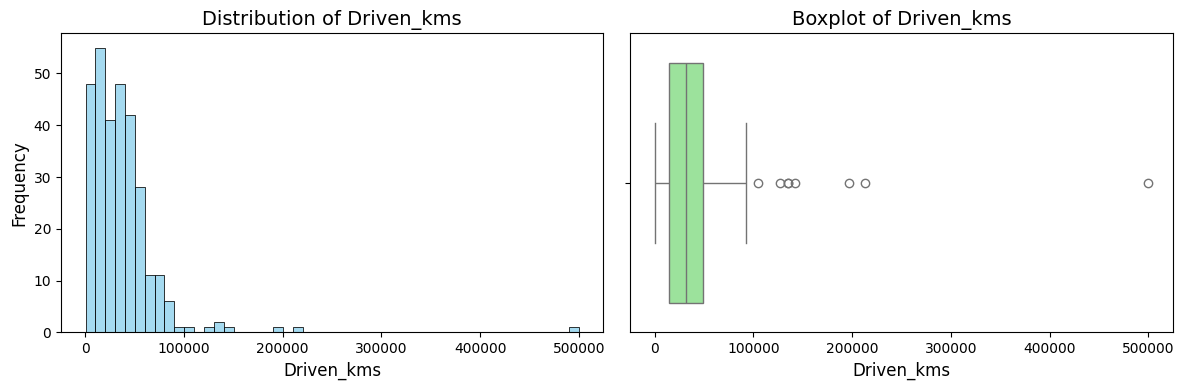

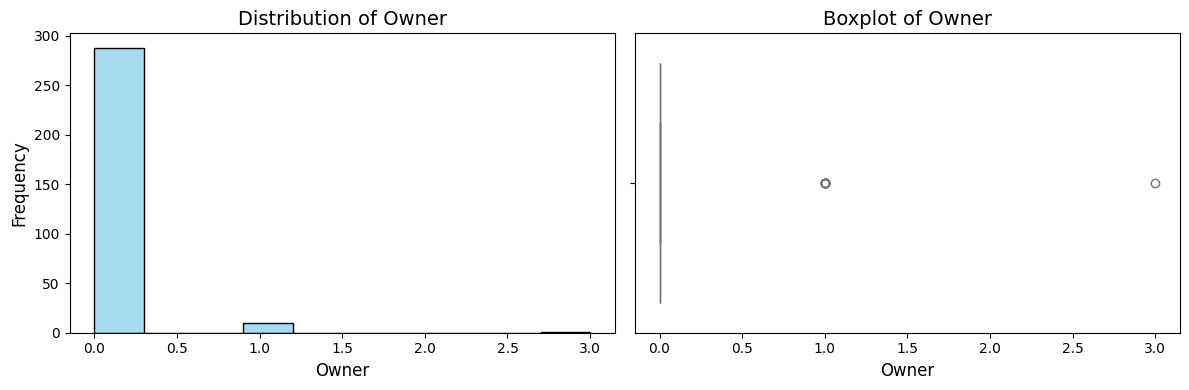

In [12]:
# Loop through each numerical column to create visualizations
for column in numerical_columns:
    # Create a figure with 2 subplots in a row
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram plot
    sns.histplot(data[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}', fontsize=14)
    ax1.set_xlabel(column, fontsize=12)
    ax1.set_ylabel('Frequency', fontsize=12)
    
    # Boxplot
    sns.boxplot(x=data[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}', fontsize=14)
    ax2.set_xlabel(column, fontsize=12)
    
    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()


In [13]:
numerical_data.skew()

Year            -1.236876
Selling_Price    2.536522
Present_Price    4.189255
Driven_kms       6.418134
Owner            7.590605
dtype: float64

#### Exploring Categorical data

In [14]:
cat_columns = ["Fuel_Type", "Selling_type", "Transmission"]

for i in cat_columns:
    print("For variable: ",i,"\n" ,data[i].value_counts(), "\n\n")

For variable:  Fuel_Type 
 Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64 


For variable:  Selling_type 
 Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64 


For variable:  Transmission 
 Transmission
Manual       260
Automatic     39
Name: count, dtype: int64 




##### Graphical representation of the categorical columns

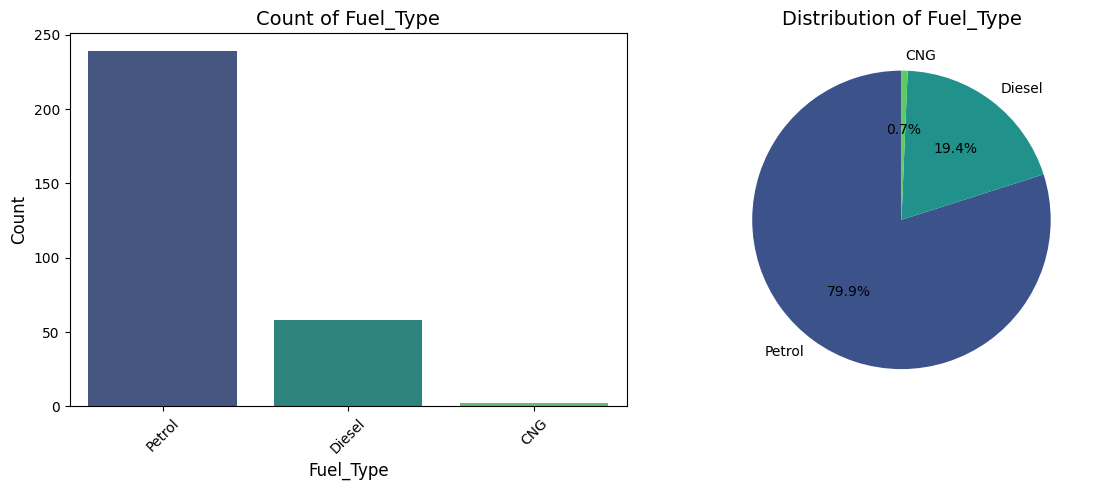

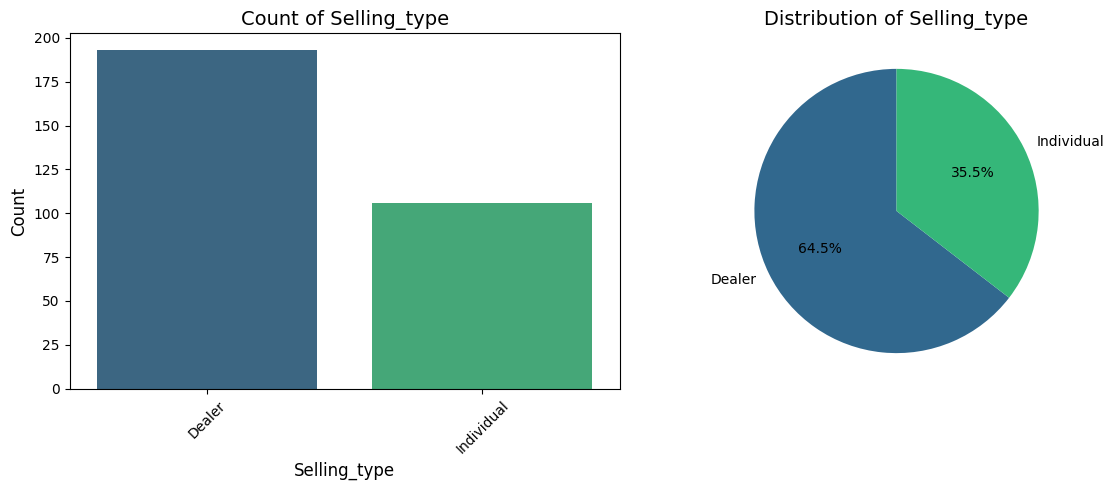

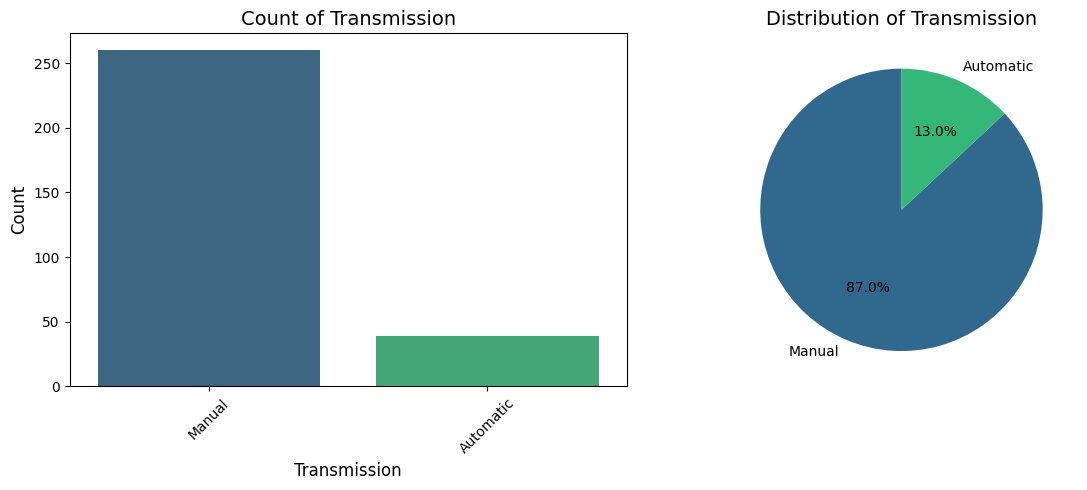

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
cat_columns = ["Fuel_Type", "Selling_type", "Transmission"]

# Loop through each categorical column to create visualizations
for column in cat_columns:
    # Create a figure with 2 subplots in a row with reduced size
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Bar plot
    sns.countplot(data=data, x=column, palette='viridis', ax=ax1)
    ax1.set_title(f'Count of {column}', fontsize=14)
    ax1.set_xlabel(column, fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    
    # Check if legend exists before removing
    if ax1.get_legend() is not None:
        ax1.get_legend().remove()

    # Pie chart
    data[column].value_counts().plot.pie(
        autopct='%1.1f%%',
        colors=sns.color_palette('viridis', len(data[column].unique())),
        ax=ax2,
        startangle=90
    )
    ax2.set_title(f'Distribution of {column}', fontsize=14)
    ax2.set_ylabel('')  # Hide y-label for pie chart

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()


### Data Pre-processing

#### Transformation

I will use log transformation on Present_Price and Driven_kms. Since those are highly positively skewed. Selling_Price will be used directly on the linear regression model since transforming it will reduce the interpretiblity. Owner is excluded from the transformation due to huge imbalannced data structure on this column.

In [16]:
data["log_Present_Price"] = np.log(data["Present_Price"])
data["log_Driven_kms"] = np.log(data["Driven_kms"])
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,log_Present_Price,log_Driven_kms
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,1.720979,10.203592
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2.255493,10.668955
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.287471,8.839277
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.423108,8.556414
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1.927164,10.656082


Again, categorical variables are needed to include in the linear regression model as dummy variables. So, we need to transform them.

In [17]:
# Convert categorical variable into dummy/indicator variables
dummies = pd.get_dummies(data[['Fuel_Type','Selling_type','Transmission']])

# Concatenate the original DataFrame and the dummy DataFrame
df = pd.concat([data, dummies], axis=1)

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,log_Present_Price,log_Driven_kms,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,1.720979,10.203592,False,False,True,True,False,False,True
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2.255493,10.668955,False,True,False,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.287471,8.839277,False,False,True,True,False,False,True
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.423108,8.556414,False,False,True,True,False,False,True
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1.927164,10.656082,False,True,False,True,False,False,True


#### Dropping Unnecessary Columns

In [18]:
df1 = df.drop(['Car_Name', 'Present_Price', 'Driven_kms','Fuel_Type', 'Selling_type', 'Transmission'],axis=1)
df1.head()

,Year,Selling_Price,Owner,log_Present_Price,log_Driven_kms,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,0,1.720979,10.203592,False,False,True,True,False,False,True
1,2013,4.75,0,2.255493,10.668955,False,True,False,True,False,False,True
2,2017,7.25,0,2.287471,8.839277,False,False,True,True,False,False,True
3,2011,2.85,0,1.423108,8.556414,False,False,True,True,False,False,True
4,2014,4.60,0,1.927164,10.656082,False,True,False,True,False,False,True


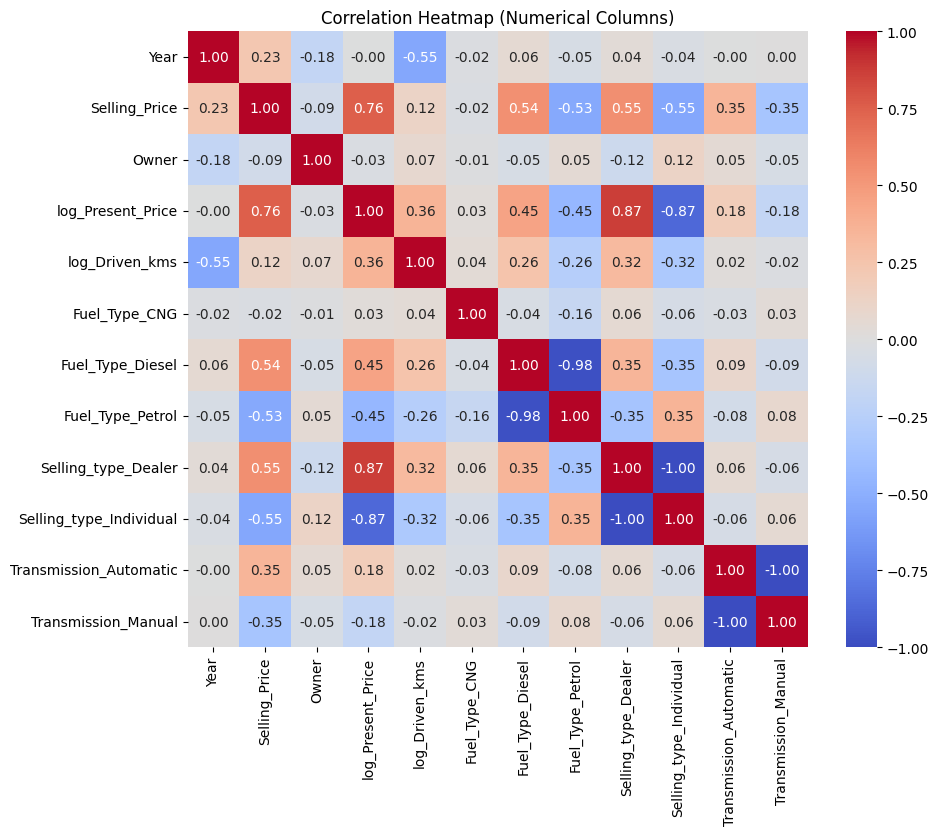

In [19]:
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

In [20]:
df2 = df1.drop(["Transmission_Manual", "Selling_type_Dealer","Fuel_Type_CNG"],axis=1)
df2.head()

,Year,Selling_Price,Owner,log_Present_Price,log_Driven_kms,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Automatic
0,2014,3.35,0,1.720979,10.203592,False,True,False,False
1,2013,4.75,0,2.255493,10.668955,True,False,False,False
2,2017,7.25,0,2.287471,8.839277,False,True,False,False
3,2011,2.85,0,1.423108,8.556414,False,True,False,False
4,2014,4.60,0,1.927164,10.656082,True,False,False,False


In [21]:
scaler = MinMaxScaler()
df2["Year"] = scaler.fit_transform(df2[["Year"]])
df2.head()

,Year,Selling_Price,Owner,log_Present_Price,log_Driven_kms,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Automatic
0,0.733333,3.35,0,1.720979,10.203592,False,True,False,False
1,0.666667,4.75,0,2.255493,10.668955,True,False,False,False
2,0.933333,7.25,0,2.287471,8.839277,False,True,False,False
3,0.533333,2.85,0,1.423108,8.556414,False,True,False,False
4,0.733333,4.60,0,1.927164,10.656082,True,False,False,False


In [22]:
y = df2["Selling_Price"]
x = df2[["Year","Owner","log_Present_Price","log_Driven_kms","Fuel_Type_Diesel","Fuel_Type_Petrol","Selling_type_Individual","Transmission_Automatic"]]


In [23]:
x.head()

,Year,Owner,log_Present_Price,log_Driven_kms,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Automatic
0,0.733333,0,1.720979,10.203592,False,True,False,False
1,0.666667,0,2.255493,10.668955,True,False,False,False
2,0.933333,0,2.287471,8.839277,False,True,False,False
3,0.533333,0,1.423108,8.556414,False,True,False,False
4,0.733333,0,1.927164,10.656082,True,False,False,False


In [24]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 35)

### Model Fitting

In [26]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred_train = linear_reg.predict(x_train)
y_pred_test = linear_reg.predict(x_test)

In [28]:
# Evaluate the model
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Testing MSE: {test_mse}")
print(f"Testing R2 Score: {test_r2}")

Testing MSE: 4.502893435781148
Testing R2 Score: 0.7457098104411131


Thus, this model explains 74.5% of the total variation.

In [29]:
# Coefficients
coefficients = linear_reg.coef_
intercept = linear_reg.intercept_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: -4.860619896048255
Coefficients: [ 5.27435623 -1.85774401  4.0937793  -0.31238158  3.53149149  0.68838419
  3.97700846  3.11751588]


### Interpretition of the model parameters
The linear regression model for predicting car selling prices shows that the intercept is -4.86, indicating a baseline value when all predictors are zero. The year of the car has a positive impact, with each additional year increasing the price by approximately 5.27 units. Conversely, each additional owner reduces the price by about 1.86 units. Higher present prices and automatic transmissions also positively affect the selling price, with coefficients of 4.09 and 3.12, respectively. More driven kilometers slightly decrease the price by 0.31 units per log unit. Diesel cars increase the selling price by 3.53 units, while petrol cars increase it by 0.69 units, compared to a reference fuel type. Additionally, cars sold by individuals rather than dealers tend to have higher selling prices, increasing by about 3.98 units. These coefficients highlight the importance of car features like age, mileage, fuel type, transmission type, and sales channel in determining their market value.